In [715]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import string

## Get the Data

**Get data**

In [716]:
df1 = pd.read_csv('/Users/dougmengistu/Documents/tweet1.csv')
df2 = pd.read_csv('/Users/dougmengistu/Documents/tweet2.csv')
df3 = pd.read_csv('/Users/dougmengistu/Documents/tweet3.csv')
df4 = pd.read_csv('/Users/dougmengistu/Documents/tweet4.csv')
df5 = pd.read_csv('/Users/dougmengistu/Documents/tweet5.csv')
df6 = pd.read_csv('/Users/dougmengistu/Documents/tweet6.csv')
df7 = pd.read_csv('/Users/dougmengistu/Documents/tweet7.csv')
df8 = pd.read_csv('/Users/dougmengistu/Documents/tweet8.csv')
df9 = pd.read_csv('/Users/dougmengistu/Documents/tweet9.csv')

**Concatinate the dataframes**

In [717]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [718]:
result = pd.concat(frames)

In [719]:
result = result.drop(labels='sentiment (S)', axis=1)

In [720]:
len(result.index)

846

**DATA**

In [721]:
result.head()

,id (S),company (S),content (S),createdAt (S),keyword (S),tweetId (N),user (S),userId (N)
0,cf842bca-b58e-4686-95e3-43f6f63c0a49,AIGInsurance,@aigkenham @AiG God says you don't need to wor...,not,AIG,8.99687e+17,AidanStreet,4.807950e+07
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09


**Filter dataset**

In [722]:
result_clean = result[(result['createdAt (S)'] != 'not') | (result['createdAt (S)'] == 'nan')]

In [723]:
result_clean.rename(index=str, columns={"content (S)": "tweets", "createdAt (S)":"sentiments"}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Total tweets after filter is 516

In [724]:
len(result_clean.index)

516

In [725]:
result_clean.head()

,id (S),company (S),tweets,sentiments,keyword (S),tweetId (N),user (S),userId (N)
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09
6,c57fa40d-b8db-42e0-8294-c74bdd7bbd32,GEICO,Join the GEICO team! See our latest #job openi...,neutral,GEICO,8.99647e+17,GEICO_Jobs,2.013487e+08


In [726]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 1 to 40
Data columns (total 8 columns):
id (S)         511 non-null object
company (S)    511 non-null object
tweets         511 non-null object
sentiments     511 non-null object
keyword (S)    511 non-null object
tweetId (N)    511 non-null object
user (S)       511 non-null object
userId (N)     511 non-null float64
dtypes: float64(1), object(7)
memory usage: 36.3+ KB


In [727]:
result_clean.columns

Index(['id (S)', 'company (S)', 'tweets', 'sentiments', 'keyword (S)',
       'tweetId (N)', 'user (S)', 'userId (N)'],
      dtype='object')

## Data Analysis

### Add tweet length for analysis

In [728]:
result_clean['tweet_length'] = result_clean['tweets'].apply(str).apply(len)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Tweets per company

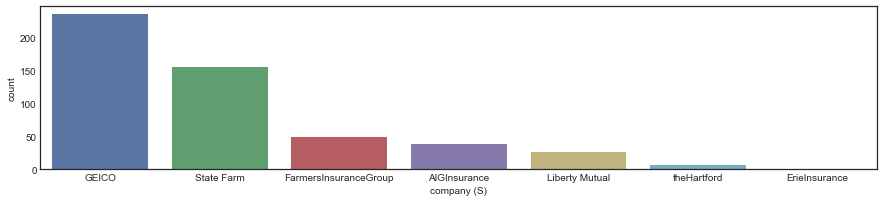

In [729]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,3))
sns.countplot(x='company (S)',data=result_clean,palette='deep')

We can conclude that GEICO has more twitter activity than all the other insurance companies. 

In [777]:
result_clean.groupby('sentiments').describe()

tweet_length                                                     \
                  count        mean        std   min     25%    50%    75%   
sentiments                                                                   
negative          158.0   99.265823  30.378172  13.0   83.00   83.0  128.0   
neutral           258.0  111.089147  29.971644  21.0  100.25  111.5  134.0   
positive           95.0  108.421053  32.824024  30.0   85.00  111.0  134.0   

                  userId (N)                                          \
              max      count          mean           std         min   
sentiments                                                             
negative    183.0      158.0  1.556934e+17  3.235619e+17  10369472.0   
neutral     164.0      258.0  1.380480e+17  3.103918e+17  14738576.0   
positive    164.0       95.0  1.378133e+17  3.089970e+17  14323863.0   

                                                                    
                     25%           50%           75%           max  
sentiments                                                          
negative    2.590260e+08  1.336939e+09  3.217931e+09  8.936034e+17  
neutral     1.678325e+08  1.360273e+09  3.313962e+09  8.996746e+17  
positive    7.284910e+07  5.295860e+08  2.674351e+09  8.940454e+17

### Tweet length per sentiment

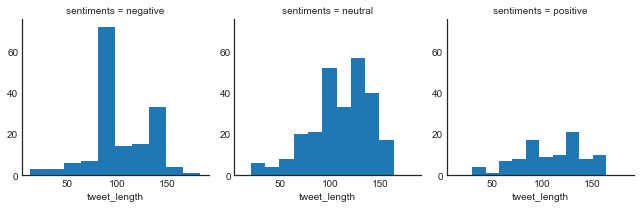

In [731]:
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(result_clean,col='sentiments')
g.map(plt.hist,'tweet_length')

Short tweets below 20 characters tend to positive, tweets in the area of 18 to 25 tend to be neutral

### Sentiment per Company

In [732]:
result_clean['company (S)'].unique()


array(['GEICO', 'State Farm', 'FarmersInsuranceGroup', 'AIGInsurance',
       'Liberty Mutual', 'theHartford', nan, 'ErieInsurance'], dtype=object)

In [733]:
# rcg=result_clean.groupby(['tweets', ])['tweets'].unique()
# len(rcg.index)
# rcg
result_clean.groupby(['company (S)','sentiments'])['sentiments'].count()

company (S)            sentiments
AIGInsurance           negative       15
                       neutral        15
                       positive        8
ErieInsurance          neutral         1
FarmersInsuranceGroup  negative        1
                       neutral        40
                       positive        8
GEICO                  negative      118
                       neutral        76
                       positive       42
Liberty Mutual         neutral        19
                       positive        7
State Farm             negative       23
                       neutral       102
                       positive       30
theHartford            negative        1
                       neutral         5
Name: sentiments, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117869630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b859e8>]], dtype=object)

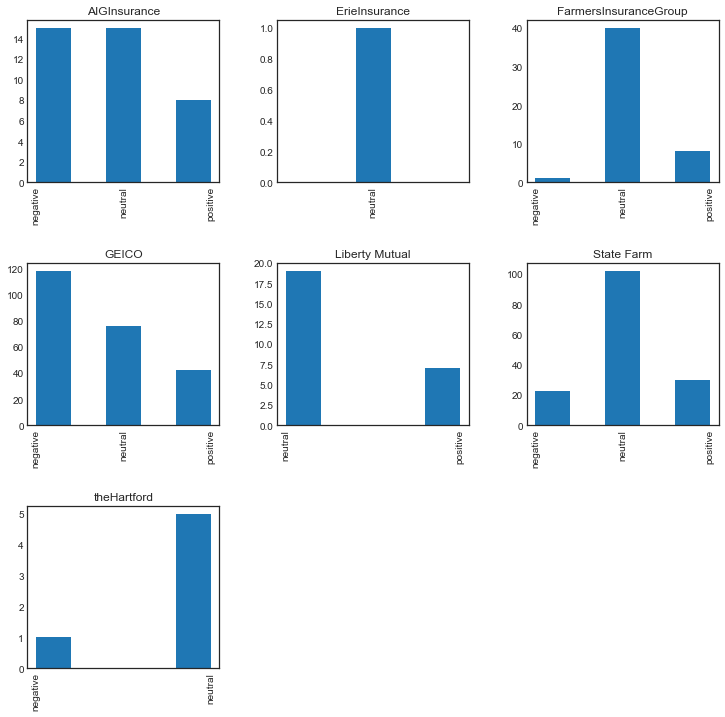

In [734]:
result_clean.hist(column='sentiments', by='company (S)', bins=5, figsize=(12,12))

Geico and AIG get a lot of negative tweets in comparision to their positive tweets. 

### Functions to provide data analysis

In [735]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = ' '.join([c for c in nopunc.split() if c.lower() not in stopwords.words('english')
                       and not c.startswith('@') and c != 'RT' and c.lower() != 'geico' ])
    return nostop

In [736]:
def removeit(mess):
    """
    1. remove punc
    2.remove stop words
    3. Take out common words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english') 
                       and not c.startswith('@') and c != 'RT' and  c.lower() != 'n' and 
                       c.lower() != 'koreas' and c.lower() != '1st' and c.lower() != 'target' and 
                       c.lower() != 'b' and c.lower() != 'dude' and c.lower() != 'makin' and 
                       c.lower() != 'tha' and c.lower() != 'geico' and c.lower() != 'soundcloud' and 
                       c.lower() != 'ads' and c.lower() !='killmefam' and c.lower()!='rt' and 
                       c.lower() != 'statefarm' and c.lower() != 'aig']
#     words = ''.join([word for word in nostop if 'RT' not in word and not word.startswith('@') and word != 'RT' and word !='N Koreas 1st Target should b the dude makin tha geico soundcloud ads' ])
    return nostop

### Count words per sentiment

In [737]:
from collections import Counter
from nltk.corpus import stopwords
results_negative = result_clean[result_clean['sentiments']=='negative']
results_neutral = result_clean[result_clean['sentiments']=='neutral']
results_positive = result_clean[result_clean['sentiments']=='positive']
results_negative['tweets'].apply(text_process)
results_neutral['tweets'].apply(text_process)
results_positive['tweets'].apply(text_process).head()


12    Well eclipse Back connecting StateFarm agents ...
25    Customer Engagement Linchpin Success FarmersIn...
34    AdamIsMyAgent GoodNeighbor mattnafziger☎️adami...
39    15 minutes could save 15 car insurance httpstc...
41    VOTE Bocas NEEDIEST children need vote StateFa...
Name: tweets, dtype: object

Function to visualize each dominant word per sentiment

In [738]:
from wordcloud import WordCloud,STOPWORDS
def wordcloudit(width=3000,height=2500,dataframe=results_negative, background_color='black', tweet='tweets' ):
    """This Function will the the following:
        1. Get a series of tweets from a dataframe and change it to one string
        2. Clean the string by removing stopwords and other undesired words that don't have any weight on sentiments
        3. Create a wordcount per cleaned word and visualize
        
    Parameters Values are:
            width is the width of imagae of the wordcloud. Default=3000
            height is the width of imagae of the wordcloud. Default=2500
            dataframe is the Dataframe to be analyzed. Default=results_negative
            background_color is the color of the backgroud of the image of the wordcloud. Default='black'
            tweet is the column name of the tweets to be analyzed. Default='tweets'
            """
    nw= ' '.join(dataframe[tweet])
    cleaned_neg = " ".join([word for word in nw.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=background_color,
                      width=width,
                      height=height
                     ).generate(cleaned_neg)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

       words  count
0        ads     63
1          b     63
2  killmefam     62
3          N     62
4     Koreas     62


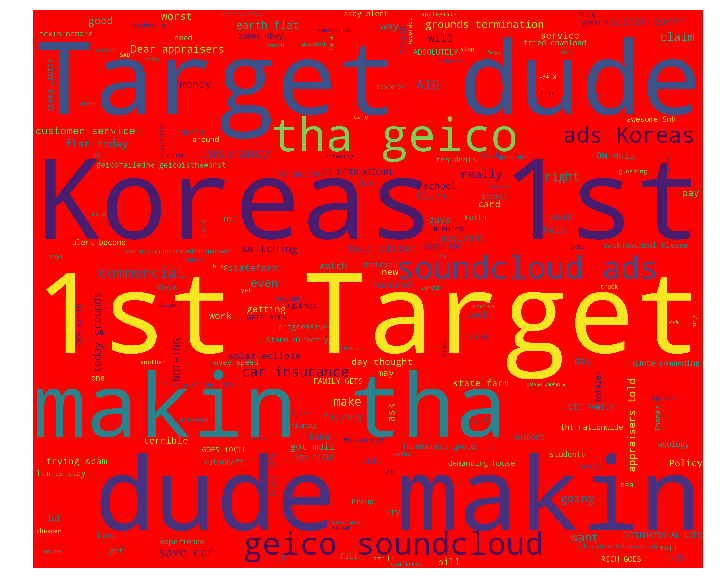

In [739]:
neg_words = Counter(" ".join(results_negative['tweets'].apply(text_process)).split()).most_common(5)
neg_words = pd.DataFrame.from_records(neg_words, columns=['words','count' ])
print(neg_words.head())
from wordcloud import WordCloud,STOPWORDS
wordcloudit(dataframe=results_negative, background_color='red')

Dominant words with an outcome of negative sentiment

       words  count
0  StateFarm     67
1  Insurance     54
2      Group     35
3      today     35
4    checked     34


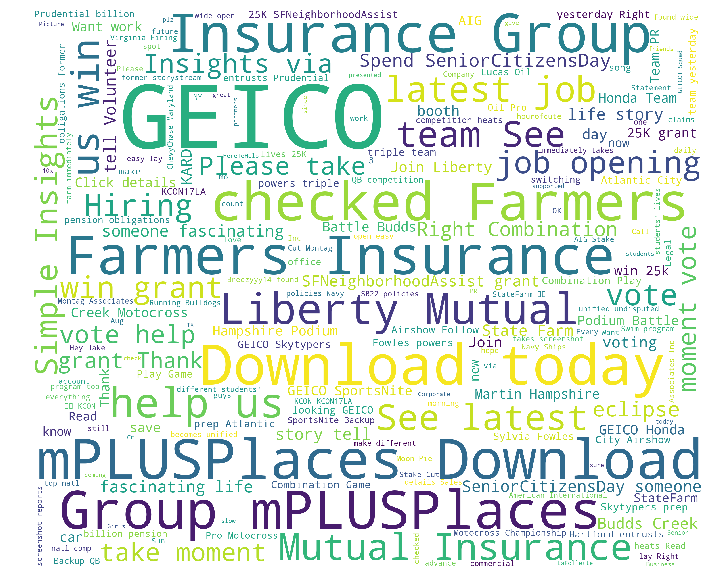

In [740]:
neut_words = Counter(" ".join(results_neutral['tweets'].apply(text_process)).split()).most_common(5)
neut_words = pd.DataFrame.from_records(neut_words, columns=['words','count' ])
print(neut_words)
wordcloudit(dataframe=results_neutral, background_color='white', tweet='tweets')

Dominant words with an outcome of neutral sentiment

       words  count
0  insurance     31
1        car     26
2  StateFarm     25
3         15     23
4  switching     17


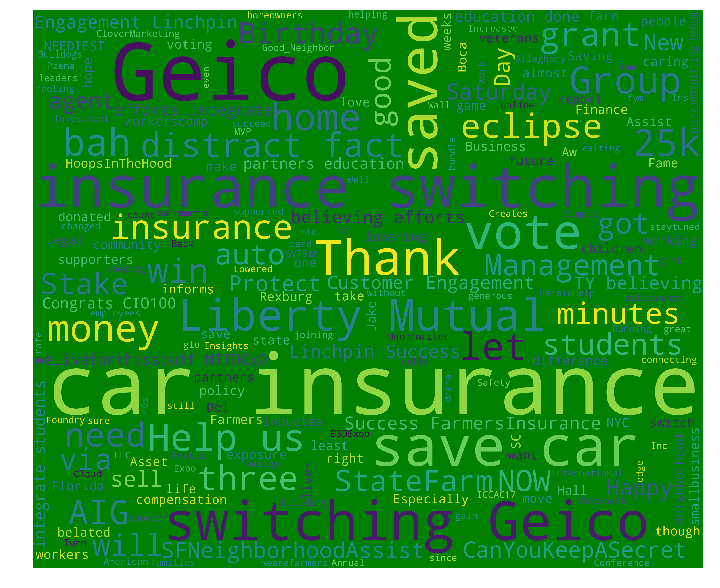

In [741]:
pos_words = Counter(" ".join(results_positive['tweets'].apply(text_process)).split()).most_common(5)
pos_words = pd.DataFrame.from_records(pos_words, columns=['words','count' ])
print(pos_words)
wordcloudit(dataframe=results_positive, background_color='green', tweet='tweets')

Dominant words with an outcome of positive sentiment

## Preparing dataset for Machine Learning 

In [774]:
# g = result_clean[['tweets', 'tweet_length']]
# z = cv.fit_transform(g)
# g['tweets'].apply(str)
# g['tweet_length'].apply(str)
# # g['tweets'].apply(str).apply(text_process).apply(lambda x: ''.join(x), axis=1)
# g['tweet_len']= g[['tweets','tweet_length']].apply(str).apply(lambda x: ''.join(x))
# g


In [743]:
x = result_clean['tweets'].apply(str)
x.shape

(516,)

In [744]:
y = result_clean['sentiments'].apply(str)
y.shape

(516,)

Count Vectorizer converts a collection of words into number representations, example below

In [745]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
example = cv.fit_transform(["hi, me and you hi"])
print(example)

  (0, 3)	1
  (0, 0)	1
  (0, 2)	1
  (0, 1)	2


In [746]:
X = cv.fit_transform(x)
X.shape

(516, 1675)

**This function will take punctuations and stopwords out of the tweets**

In [747]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english')]
    return nostop

**This method will split training and testing datasets**

In [748]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

The test size is 30% of the filtered dataset, and the training is the rest 70%. Note this is the default split.

# Multinomial Naive Bayes without Tfidf

**Multinomial Naive Bayes models the word counts and adjusts the formula to word counts. **

In [749]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

** Use X_train (70% of tweets) and y_train (70% of sentiment) to train the model**

In [750]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict X_test (30% of the tweets) that were not used to train the model**

In [751]:
print(type(X_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [752]:
predictions = nb.predict(X_test)

In [753]:
from sklearn.metrics import confusion_matrix,classification_report

In [754]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 0  0  1  0]
 [ 0 36  5 14]
 [ 0  4 60 10]
 [ 0  0  8 17]]


             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.90      0.65      0.76        55
    neutral       0.81      0.81      0.81        74
   positive       0.41      0.68      0.52        25

avg / total       0.77      0.73      0.74       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Multinomial Naive Bayes with pipeline of Count Vectorizer and Tfidf

**Create a pipeline**

Import Tfidf Transformer which counts words and weights their effects on the outcome 

Import stopwords, words that donot have any value example, is, he or has

Import Pipeline which create a pipeline for a dataset.

In [755]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [756]:
pipeline_MultinomialNB = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Pipeline is a method employed to streamline the data pre-processing and applying the Machine Learning model

**Define the tweets as 'X' and the sentiments as 'y' to split **

In [757]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

The test size is 30% of the filtered dataset, and the training is the rest 70%. Note this is the default split.

In [758]:
pipeline_MultinomialNB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11d4431e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [759]:
# from sklearn.externals import joblib
# joblib.dump(pipeline_MultinomialNB, '/Users/dougmengistu/Documents/jobnb2.pickle') 

In [760]:
predictions_MultinomialNB = pipeline_MultinomialNB.predict(X_test)

In [761]:
print(confusion_matrix(y_test,predictions_MultinomialNB))


[[ 0  0  1  0]
 [ 0 31 20  4]
 [ 0  3 67  4]
 [ 0  0 15 10]]


Confusion matrix displays how many of the predictions are wrong/correct and where the wrong predictions were misplaced. In this case both columns and indexes are labeled [nan,negative,neutral,positive]

In [762]:
print(classification_report(y_test,predictions_MultinomialNB))

             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.91      0.56      0.70        55
    neutral       0.65      0.91      0.76        74
   positive       0.56      0.40      0.47        25

avg / total       0.72      0.70      0.68       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classification Method 

In [763]:
from sklearn.ensemble import RandomForestClassifier

In [764]:
pipeline_RandomForestClassifier = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ using micro Decision Tree classifier
])

In [765]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [766]:
pipeline_RandomForestClassifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11d4431e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [767]:
predictions_RandomForestClassifier = pipeline_RandomForestClassifier.predict(X_test)

In [768]:
print(confusion_matrix(y_test,predictions_RandomForestClassifier))
print(classification_report(y_test,predictions_RandomForestClassifier))

[[ 1  0  0  0]
 [ 0 32 22  1]
 [ 0  2 66  6]
 [ 0  0 14 11]]
             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       0.94      0.58      0.72        55
    neutral       0.65      0.89      0.75        74
   positive       0.61      0.44      0.51        25

avg / total       0.75      0.71      0.70       155



# SVC

In [769]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1, 1,10,50,70,100,1000], 'gamma':[1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [770]:
pipeline_grid = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GridSearchCV(SVC(),param_grid)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [771]:
pipeline_grid.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11d4431e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0))])

In [772]:
predictions_grid = pipeline_grid.predict(X_test)

In [773]:
print(confusion_matrix(y_test,predictions_grid))
print('\n')
print(classification_report(y_test,predictions_grid))

[[ 1  0  0  0]
 [ 0 32 18  5]
 [ 0  1 67  6]
 [ 0  1 12 12]]


             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       0.94      0.58      0.72        55
    neutral       0.69      0.91      0.78        74
   positive       0.52      0.48      0.50        25

avg / total       0.75      0.72      0.72       155

